@author: Mahesh Gaya

@description: project 3 Question 1 part A

-----------------------------------------------------
# Indoor localization data 
http://archive.ics.uci.edu/ml/datasets/UJIIndoorLoc

## Classification Problem

#### Predict `actual building` and `floor identification`
-----------------------------------------------------

|Attribute |Information
|----------|-----------
|Attribute 001 (WAP001)| Intensity value for WAP001. Negative integer values from -104 to 0 and +100. Positive value 100 used if WAP001 was not detected.
|....|
|Attribute 520 (WAP520)| Intensity value for WAP520. Negative integer values from -104 to 0 and +100. Positive Vvalue 100 used if WAP520 was not detected.
|Attribute 521 (Longitude)| Longitude. Negative real values from -7695.9387549299299000 to -7299.786516730871000
|Attribute 522 (Latitude)| Latitude. Positive real values from 4864745.7450159714 to 4865017.3646842018.
|Attribute 523 (Floor)| Altitude in floors inside the building. Integer values from 0 to 4.
|Attribute 524 (BuildingID)| ID to identify the building. Measures were taken in three different buildings. Categorical integer values from 0 to 2.
|Attribute 525 (SpaceID)| Internal ID number to identify the Space (office, corridor, classroom) where the capture was taken. Categorical integer values.
|Attribute 526 (RelativePosition)| Relative position with respect to the Space (1 - Inside, 2 - Outside in Front of the door). Categorical integer values.
|Attribute 527 (UserID)| User identifier (see below). Categorical integer values.
|Attribute 528 (PhoneID)| Android device identifier (see below). Categorical integer values.
|Attribute 529 (Timestamp)| UNIX Time when the capture was taken. Integer value.


---------------------------------------------

| UserID | Anonymized user | Height (cm)  
|:---|:------------|:--------
|0 | USER0000 (Validation User)| N/A 
|1 | USER0001 | 170
|2 | USER0002 | 176
|3 | USER0003 | 172
|4 | USER0004 | 174
|5 | USER0005 | 184
|6 | USER0006 | 180
|7 | USER0007 | 160
|8 | USER0008 | 176
|9 | USER0009 | 177
|10| USER0010 | 186
|11| USER0011 | 176
|12| USER0012 | 158
|13| USER0013 | 174
|14| USER0014 | 173
|15| USER0015 | 174
|16| USER0016 | 171
|17| USER0017 | 166
|18| USER0018 | 162

----------------------------------------------

|PhoneID |Android Device |Android Ver. |UserID
|--------|---------------|-------------|-------
|0  | Celkon A27  | 4.0.4(6577) | 0
|1  | GT-I8160    | 2.3.6       | 8
|2  | GT-I8160    | 4.1.2       | 0
|3  | GT-I9100    | 4.0.4       | 5
|4  | GT-I9300    | 4.1.2       | 0
|5  | GT-I9505    | 4.2.2       | 0
|6  | GT-S5360    | 2.3.6       | 7
|7  | GT-S6500    | 2.3.6       | 14
|8  | Galaxy Nexus | 4.2.2      | 10
|9  | Galaxy Nexus | 4.3        | 0
|10 | HTC Desire HD| 2.3.5      | 18
|11 | HTC One      | 4.1.2      | 15
|12 | HTC One      | 4.2.2      | 0
|13 | HTC Wildfire S | 2.3.5    | 0,11
|14 | LT22i          | 4.0.4    | 0,1,9,16
|15 | LT22i          | 4.1.2    | 0
|16 | LT26i          | 4.0.4    | 3
|17 | M1005D         | 4.0.4    | 13
|18 | MT11i          | 2.3.4    | 4
|19 | Nexus 4        | 4.2.2    | 6
|20 | Nexus 4        | 4.3      | 0
|21 | Nexus S        | 4.1.2    | 0
|22 | Orange Monte Carlo | 2.3.5 | 17
|23 | Transformer TF101  | 4.0.3 | 2
|24 |bq Curie        | 4.1.1    | 12

----------------------------------------------

In [2]:
"""
 PART 1 
"""
import pandas 
import numpy 
from sklearn.linear_model import SGDClassifier 
from sklearn import model_selection
from sklearn import metrics
'''
 Read the training data
'''
train_data = pandas.read_csv('./UJIndoorLoc/trainingData.csv')
#print(train_data)
'''
Read the test data (Validation data)
'''
test_data = pandas.read_csv('./UJIndoorLoc/validationData.csv')
#print(test_data)

'''
Predictors
'''
all_columns = train_data.columns #gets all the columns
predictors = all_columns[:520].values.tolist() #truncate only the WAPxxx
#print(predictors)
columns_to_predict = all_columns[522:524].values.tolist() #get Floor and BuildingID
#print(columns_to_predict)
#Predicting Floor
'''
Create an instance of the SGDClassifier
'''
classifier = SGDClassifier()

'''
Fit the data to predict floor
'''
classifier.fit(train_data[predictors], train_data[columns_to_predict[0]])

'''
Predictions
'''

indoor_predictions = classifier.predict(test_data[predictors])
print(metrics.accuracy_score(test_data[columns_to_predict[0]],\
indoor_predictions))


0.730873087309


In [6]:
def calculate_avgerage_accuracy(list):
    sum = 0
    for item in list:
        sum = sum + item
    return sum/(len(list))
#Test
#list = range(0,10)
#print(str(calculate_avgerage_accuracy(list)))

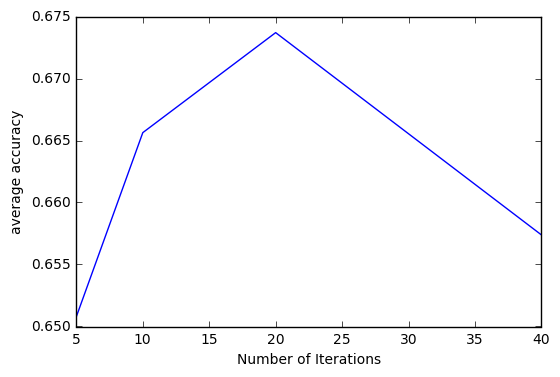

In [32]:
'''
Plot
'''
import matplotlib.pyplot as plt
%matplotlib inline

#alpha = 0.5, n_jobs=-1, class_weight=None
avg_accuracies = [0.6508010801083199, 0.66563456345668, 0.6736993699373199, 0.65738973897424]
x_values = [5, 10, 20, 40]


plt.plot(x_values, avg_accuracies)
plt.xlabel('Number of Iterations')
plt.ylabel('average accuracy')
plt.show()

# Default Classifier

|num | accuracy
|----|---------
|1|0.636363636364
|2|0.505850585059
|3|0.63096309631
|4|0.677767776778
|5|0.700270027003
|6|0.576057605761
|7|0.711071107111
|8|0.711071107111
|9|0.61296129613
|10|0.54095409541
|11|0.688568856886
|12|0.639063906391
|13|0.508550855086
|14|0.667866786679
|15|0.481548154815
|16|0.727272727273
|17|0.496849684968
|18|0.706570657066
|19|0.700270027003
|20|0.739873987399
|21|0.614761476148
|22|0.564356435644
|23|0.558055805581
|24|0.644464446445
|25|0.425742574257

In [310]:
calculate_avgerage_accuracy([0.636363636364, 0.505850585059, 0.63096309631, 0.677767776778, 0.700270027003,\
                            0.576057605761, 0.711071107111, 0.711071107111, 0.61296129613, 0.54095409541,\
                            0.688568856886, 0.639063906391, 0.508550855086, 0.667866786679, 0.481548154815,\
                            0.727272727273, 0.496849684968, 0.706570657066, 0.700270027003, 0.739873987399,\
                            0.614761476148, 0.564356435644, 0.558055805581, 0.644464446445, 0.425742574257])

0.61868586858712

### Columns to predict
Columns_to_predict = ["FLOOR", "BUILDINGID"]

### Default:
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
       



In [30]:
'''
Create an instance of the SGDClassifier
'''
classifier = SGDClassifier(alpha=0.5, n_jobs=-1, n_iter=40)

'''
Fit the data to predict floor
'''
classifier.fit(train_data[predictors], train_data[columns_to_predict[0]])

'''
Predictions
'''

indoor_predictions = classifier.predict(test_data[predictors])
print(metrics.accuracy_score(test_data[columns_to_predict[0]],\
indoor_predictions))


0.643564356436


# Alpha=0.5, n_jobs=-1, n_iter=40
Timestamp: 5:55 PM, Oct 30, 2016

|num|accuracy
|---|--------
|1|0.740774077408
|2|0.711071107111
|3|0.637263726373
|4|0.72097209721
|5|0.685868586859
|6|0.664266426643
|7|0.66696669667
|8|0.579657965797
|9|0.636363636364
|10|0.721872187219
|11|0.738073807381
|12|0.662466246625
|13|0.720072007201
|14|0.702070207021
|15|0.628262826283
|16|0.502250225023
|17|0.619261926193
|18|0.718271827183
|19|0.689468946895
|20|0.551755175518
|21|0.55895589559
|22|0.606660666067
|23|0.591359135914
|24|0.737173717372
|25|0.643564356436

In [31]:
calculate_avgerage_accuracy([0.740774077408, 0.711071107111, 0.637263726373, 0.72097209721, 0.685868586859,\
                            0.664266426643, 0.66696669667, 0.579657965797, 0.636363636364, 0.721872187219,\
                            0.738073807381, 0.662466246625, 0.720072007201, 0.702070207021, 0.628262826283,\
                            0.502250225023, 0.619261926193, 0.718271827183, 0.689468946895, 0.551755175518,\
                            0.55895589559, 0.606660666067, 0.591359135914, 0.737173717372, 0.643564356436])

0.65738973897424

# Alpha=0.001, n_jobs=-1, n_iter=40
Timestamp: 5:45 PM Oct 30, 2016

|num| accuracy
|---|---------
|1|0.740774077408
|2|0.556255625563
|3|0.729072907291
|4|0.660666066607
|5|0.712871287129
|6|0.730873087309
|7|0.728172817282
|8|0.664266426643
|9|0.729072907291
|10|0.694869486949
|11|0.681368136814
|12|0.597659765977
|13|0.735373537354
|14|0.596759675968
|15|0.634563456346
|16|0.653465346535
|17|0.740774077408
|18|0.711071107111
|19|0.662466246625
|20|0.694869486949
|21|0.730873087309
|22|0.557155715572
|23|0.596759675968
|24|0.639063906391
|25|0.630063006301

In [276]:
calculate_avgerage_accuracy([0.740774077408, 0.556255625563, 0.729072907291, 0.660666066607, 0.712871287129,\
                            0.730873087309, 0.728172817282, 0.664266426643, 0.729072907291, 0.694869486949, \
                            0.681368136814, 0.597659765977, 0.735373537354, 0.596759675968, 0.634563456346, \
                            0.653465346535, 0.740774077408, 0.711071107111, 0.662466246625, 0.694869486949, \
                            0.730873087309, 0.557155715572, 0.596759675968, 0.639063906391, 0.630063006301])

0.672367236724

# Alpha=0.5, n_jobs=-1, n_iter=40
Timestamp: 5:31 PM Oct 30, 2016

|num|accuracy
|---|--------
|1|0.684068406841
|2|0.550855085509
|3|0.618361836184
|4|0.665166516652
|5|0.720072007201
|6|0.731773177318
|7|0.692169216922
|8|0.697569756976
|9|0.736273627363
|10|0.581458145815
|11|0.635463546355
|12|0.628262826283
|13|0.718271827183
|14|0.596759675968
|15|0.717371737174
|16|0.734473447345
|17|0.705670567057
|18|0.706570657066
|19|0.638163816382
|20|0.59495949595
|21|0.697569756976
|22|0.711071107111
|23|0.575157515752
|24|0.731773177318
|25|0.503150315032

In [250]:
calculate_avgerage_accuracy([0.684068406841, 0.550855085509, 0.618361836184, 0.665166516652, 0.720072007201,\
                            0.731773177318, 0.692169216922, 0.697569756976, 0.736273627363, 0.581458145815,\
                            0.635463546355, 0.628262826283, 0.718271827183, 0.596759675968, 0.717371737174,\
                            0.734473447345, 0.705670567057, 0.706570657066, 0.638163816382, 0.59495949595,\
                            0.697569756976, 0.711071107111, 0.575157515752, 0.731773177318, 0.503150315032])

0.66289828982932

# Alpha=0.5, n_jobs=-1, n_iter=20
Timestamp: 3:02 PM Oct 30, 2016

|num| accuracy
|---|----------
|1|0.670567056706
|2|0.730873087309
|3|0.738073807381
|4|0.550855085509
|5|0.747074707471
|6|0.6399639964
|7|0.668766876688
|8|0.74797479748
|9|0.720072007201
|10|0.700270027003
|11|0.689468946895
|12|0.579657965797
|13|0.730873087309
|14|0.630063006301
|15|0.684068406841
|16|0.740774077408
|17|0.716471647165
|18|0.698469846985
|19|0.606660666067
|20|0.607560756076
|21|0.683168316832
|22|0.652565256526
|23|0.505850585059
|24|0.69396939694
|25|0.708370837084

In [224]:
calculate_avgerage_accuracy([0.670567056706, 0.730873087309, 0.738073807381, 0.550855085509, 0.747074707471,\
                            0.6399639964, 0.668766876688, 0.74797479748, 0.720072007201, 0.700270027003,\
                            0.689468946895, 0.579657965797, 0.730873087309, 0.630063006301, 0.684068406841, \
                            0.740774077408, 0.716471647165, 0.698469846985, 0.606660666067, 0.607560756076,\
                            0.683168316832, 0.652565256526, 0.505850585059, 0.69396939694, 0.708370837084])

0.6736993699373199

# Alpha=0.5, n_jobs = -1, n_iter=10
Timestamp: 2:55 PM Oct 30, 2016

|num| accuracy
|---|---------
|1|0.726372637264
|2|0.647164716472
|3|0.618361836184
|4|0.732673267327
|5|0.74797479748
|6|0.590459045905
|7|0.630063006301
|8|0.66696669667
|9|0.737173717372
|10|0.593159315932
|11|0.72097209721
|12|0.6399639964
|13|0.712871287129
|14|0.573357335734
|15|0.583258325833
|16|0.688568856886
|17|0.709270927093
|18|0.663366336634
|19|0.703870387039
|20|0.572457245725
|21|0.670567056706
|22|0.712871287129
|23|0.664266426643
|24|0.616561656166
|25|0.718271827183

In [194]:
calculate_avgerage_accuracy([0.726372637264, 0.647164716472, 0.618361836184, 0.732673267327, 0.74797479748,\
                            0.590459045905, 0.630063006301, 0.66696669667, 0.737173717372, 0.593159315932,\
                            0.72097209721, 0.6399639964, 0.712871287129, 0.573357335734, 0.583258325833, \
                            0.688568856886, 0.709270927093, 0.663366336634, 0.703870387039, 0.572457245725,\
                            0.670567056706, 0.712871287129, 0.664266426643, 0.616561656166, 0.718271827183])

0.66563456345668

# Alpha 1.0, n_jobs = -1
Timestamp: 2:44 PM Oct 30, 2016

|num| accuracy
|---|---------
|1|0.730873087309
|2|0.700270027003
|3|0.632763276328
|4|0.658865886589
|5|0.728172817282
|6|0.525652565257
|7|0.732673267327
|8|0.658865886589
|9|0.676867686769
|10|0.728172817282
|11|0.701170117012
|12|0.718271827183
|13|0.730873087309
|14|0.750675067507
|15|0.640864086409
|16|0.704770477048
|17|0.676867686769
|18|0.510351035104
|19|0.545454545455
|20|0.586858685869
|21|0.558055805581
|22|0.611161116112
|23|0.573357335734
|24|0.721872187219
|25|0.610261026103

In [165]:
calculate_avgerage_accuracy([0.730873087309, 0.700270027003, 0.632763276328, 0.658865886589, 0.728172817282,\
                            0.525652565257, 0.732673267327, 0.658865886589, 0.676867686769, 0.728172817282,\
                            0.701170117012, 0.718271827183, 0.730873087309, 0.750675067507, 0.640864086409,\
                            0.704770477048, 0.676867686769, 0.510351035104, 0.545454545455, 0.586858685869,\
                            0.558055805581, 0.611161116112, 0.573357335734, 0.721872187219, 0.610261026103])

0.65656165616596

# Alpha = 0.5
Timestamp: 1:58 PM Oct 30, 2016

|num|accuracy
|---|--------
|1|0.586858685869
|2|0.713771377138
|3|0.740774077408
|4|0.644464446445
|5|0.68496849685
|6|0.678667866787
|7|0.571557155716
|8|0.740774077408
|9|0.673267326733
|10|0.587758775878
|11|0.702070207021
|12|0.644464446445
|13|0.626462646265
|14|0.496849684968
|15|0.565256525653
|16|0.714671467147
|17|0.643564356436
|18|0.707470747075
|19|0.640864086409
|20|0.639063906391
|21|0.544554455446
|22|0.751575157516
|23|0.653465346535
|24|0.710171017102
|25|0.606660666067

In [139]:
calculate_avgerage_accuracy([0.586858685869, 0.713771377138, 0.740774077408, 0.644464446445, 0.68496849685, \
                             0.678667866787, 0.571557155716, 0.740774077408, 0.673267326733, 0.587758775878, \
                            0.702070207021, 0.644464446445, 0.626462646265, 0.496849684968, 0.565256525653, \
                            0.714671467147, 0.643564356436, 0.707470747075, 0.640864086409, 0.639063906391, \
                            0.544554455446, 0.751575157516, 0.653465346535, 0.710171017102, 0.606660666067])

0.6508010801083199